In [17]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import os
from ipywidgets import Checkbox, interactive
from IPython.display import display

In [18]:
def getInfo(fileName):
    mode = fileName[2]
    idx2= fileName.rfind("_")
    idx1 = fileName.rfind("_",0,idx2);
    opt = fileName[idx1+1:idx2]
    idx3 = fileName.rfind(".")
    lr = fileName[idx2+1:idx3]
    
    return mode,opt,lr


In [19]:
def nameBack(filename):
    lr_x=filename.rfind("_")
    lr =filename[lr_x+1:]  ##initial learning rate
    print(lr)
    typeName=filename[0:lr_x-3] ## optimization type
    print(typeName)
    opt_x =filename.find("_") 
    opt = filename[0:opt_x]  ## optimazation name
    print(opt)
    if (typeName=="sgd_constant"): type=6
    elif (typeName=="sgd_stepDecay"): type = 4
    elif (typeName=="sgd_timeBasedDecay"): type= 3
    elif (typeName=="sgd_exponentialDecay"): type = 5
    s = "lr"+str(type)+"_none_1.0_"+opt+"_"+lr+".log"
    return s

In [20]:
d = {'sgd_constant':[],
     'sgd_stepDecay':[],
     'sgd_timeBasedDecay':[],
     'sgd_exponentialDecay':[],
     'adam':[],
     }
path='./logs/'
filenames=[]

for file in os.listdir(path):
    filenames.append(file)
    mode,opt,lr = getInfo(file)

    if mode=="6" and opt=="sgd":
        d['sgd_constant'].append(file)
    elif mode=="4" and opt=="sgd":
        d['sgd_stepDecay'].append(file)       
    elif mode=="3" and opt=="sgd":
        d['sgd_timeBasedDecay'].append(file)
    elif mode=="3" and opt=="sgd":
        d['sgd_exponentialDecay'].append(file)
   

    elif mode=="6" and opt=="adam":
        d['adam'].append(file)


In [14]:

l = ["sgd_constant","sgd_stepDecay", "sgd_timeBasedDecay","sgd_exponentialDecay"]
chk = [Checkbox(description=a) for a in l]

checked=[]
def updatePlot(**kwargs):
    for k, v in kwargs.items():
        if v==True and (k not in checked): checked.append(k)
        if v==False and (k in checked) : checked.remove(k)

interact(updatePlot, **{c.description: c.value for c in chk})  


interactive(children=(Checkbox(value=False, description='sgd_constant'), Checkbox(value=False, description='sg…

<function __main__.updatePlot(**kwargs)>

In [21]:
intToType={"6":"sgd_constant","4":"sgd_stepDecay","3":"sgd_timeBasedDecay","5":"sgd_exponentialDecay"}
checkedListName=[]
for i in checked:
    for j in d[i]:
        mode,opt,lr=getInfo(j)
        labelInfo = intToType[mode]+"_"+"lr_"+lr
        checkedListName.append(labelInfo)

checkedList=[]
chk = [Checkbox(description=a) for a in checkedListName]

def updatePlot(**kwargs):
    for k, v in kwargs.items():
        if v==True and (k not in checkedList): checkedList.append(k)
        if v==False and (k in checkedList) : checkedList.remove(k)

interact(updatePlot, **{c.description: c.value for c in chk})  


interactive(children=(Checkbox(value=False, description='sgd_constant_lr_0.01'), Checkbox(value=False, descrip…

<function __main__.updatePlot(**kwargs)>

0.01
sgd_constant
sgd
0.15
sgd_constant
sgd
0.2
sgd_constant
sgd
0.1
sgd_stepDecay
sgd
0.2
sgd_stepDecay
sgd
0.25
sgd_stepDecay
sgd


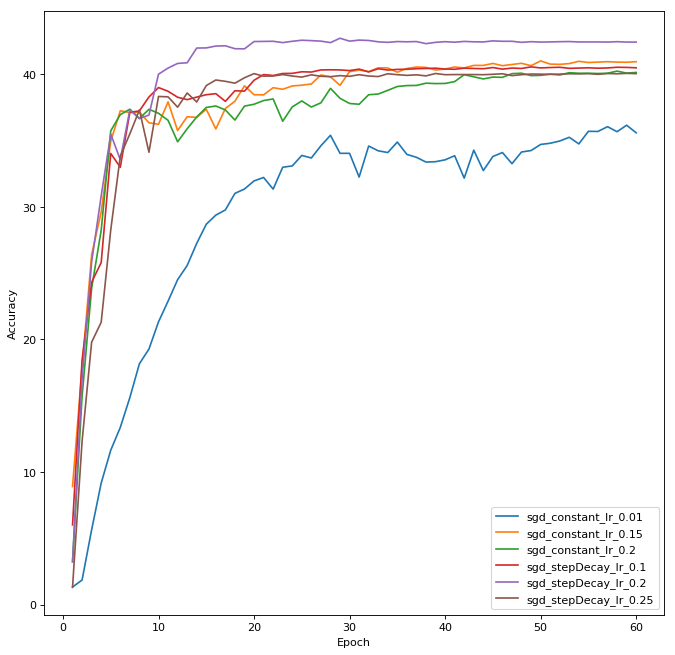

In [22]:
#plt.axis([0,100,0,100])

printList=[]
for i in checkedList:
    printList.append(nameBack(i))
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
for filename in printList: 
    plot_x=[]
    plot_y=[]
    opt=[]
    path="./logs/"+filename

    lines =[line.rstrip('\n') for line in open(path)]
    for i in lines:

        if "Epoch" in i:
            x=i.find("accuracy:")
            y=i.find("(")

            plot_x.append(int(i[6:x-3]))
            plot_y.append(float(i[x+10:y-2]))
        
    mode,opt,lr = getInfo(filename)
    labelInfo = intToType[mode]+"_"+"lr_"+lr
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(plot_x,plot_y,label=labelInfo)   
plt.legend();